In [7]:
# Librariile necesare
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook
from numpy import linalg # pentru norma

<IPython.core.display.Javascript object>


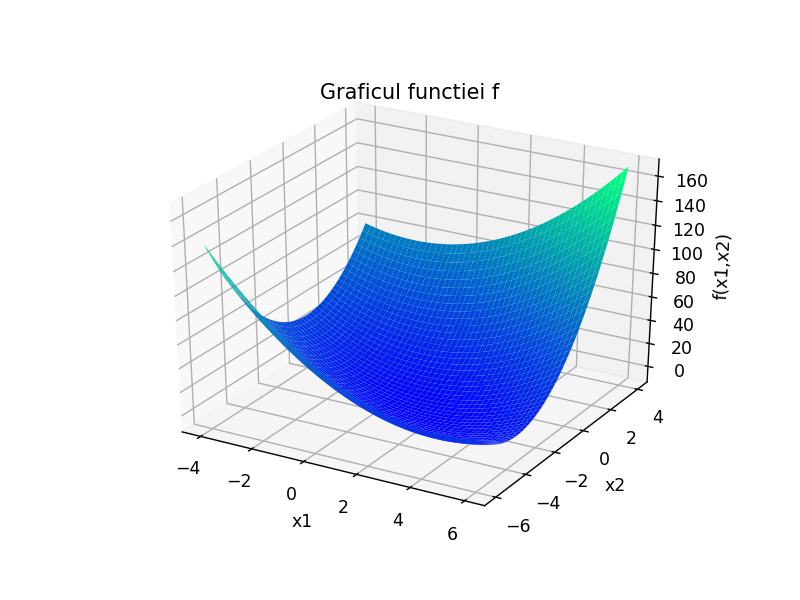

<IPython.core.display.Javascript object>


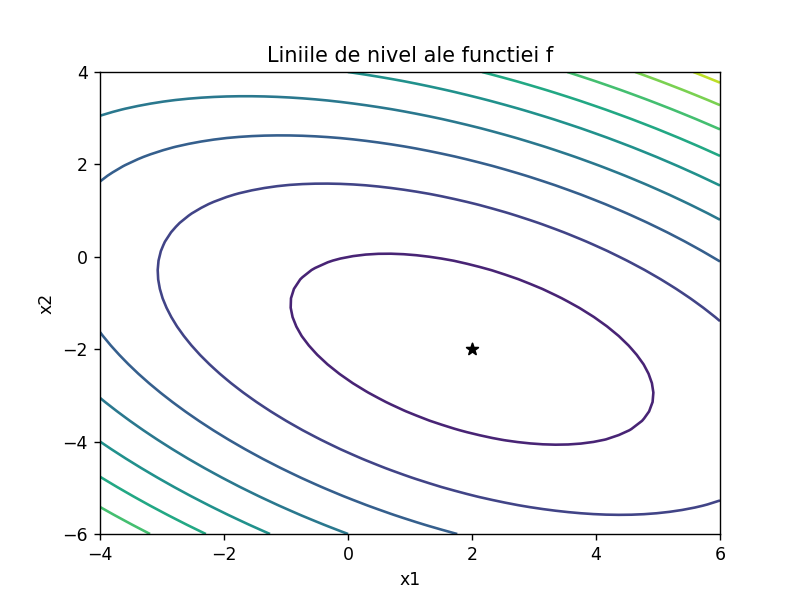

In [8]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 10) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()
        
# Definire functie f prin matricea A si vectorul b
A = np.array([[3, 2],[2, 6]]).astype(float) # Matrice pozitiv definita
b = np.array([[2],[-8]]).astype(float)

# Apelare functii grafic
grafic_f(A,b)
linii_nivel(A,b)

# Punctul de minim determinat prin rezolvarea sistemului A*x=b
#x_num = MEGPP(A,b)

aext = np.hstack((A, b)) # construire a extins
aext = gpp(aext) # aplic metoda gauss cu pivotare
n = A.shape[0] # nr linii
c = aext[:, [n]] # ultima coloana din aext; vector coloana
u = aext[:, :n] # primele n coloane
x_num = np.array([[float('nan')]] * n)
x_num = SubsDesc(u, c) # calculez solutia cu subsdesc(u, c)

plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='*')
plt.show()

In [9]:
# Functii deja implementate necesare: Introduceti orice functie scrisa de voi care rezolva direct un sistem liniar
def gpp(aext):
    n = np.shape(aext)[0] # nr linii
    for k in range(n-1):
        p = np.argmax(np.abs(aext[:, k])) # indicele elem maxim de pe col k in jos 
        p += k # adaug offsetul
        aext[[p, k]] = aext[[k, p]] # swap linia p cu linia k
        for l in range(k+1, n):
            aext[l] = aext[l] - (aext[l][k] / aext[k][k]) * aext[k] 
    return aext

def SubsDesc(u, c,  epsilon = 10**(-14)):
    if abs(np.linalg.det(u)) > epsilon:
        n = np.shape(u)[0] # nr linii
        for k in range(n-1, -1, -1):
            x_num[k] = (c[k] - np.dot(u[k][k+1 : ], x_num[k+1 : ])) / u[k][k]
    return x_num

def met_pas_desc(A, b, eps = 1e-14):
    x = np.array([0] * A.shape[0])
    x_steps = [x]
    #TODO verificat A sim + poz def(criteriul lui sylvester)
#     if (is_poz_def(A) == False | (A != A.T).any()):
#         print("Matricea A trb sa fie simetrica si poz def ")
    k = 0
    r = b - A@x
    while linalg.norm(r) > eps: # norma 2 (euclidian distance)
        alpha = (r.T @ r) / (r.T @ A @ r) # scalar
        x = x + alpha * r
        r = b - A @ x
        k += 1
        x_steps.append(x) # rezultatele de la fiecare pas
    return x, x_steps
x, x_steps = met_pas_desc(A, b)
x, len(x_steps) # ajunge in 35 de pasi la rezultat

(array([[ 2.,  2.],
        [-2., -2.]]),
 60)

### Construieste graficul functiei patratice definite de matricea A si vectorul b
$$f:\mathbf{R}^n\longrightarrow\mathbf{R}, \quad f(x) = \frac{1}{2}x^T A x - b x$$

In [3]:
A.shape[0]

NameError: name 'A' is not defined